## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Conclusion](#conclude)
- [Part V - References and Additional Materials used](#references)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [201]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [202]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [203]:
print('\nRows in the database : ')
print(df.shape[0])


Rows in the database : 
294478


c. The number of unique users in the dataset.

In [204]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [205]:
prp = df[df['converted'] == 1].user_id.count() / df['user_id'].count()
prp

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [206]:
#Here we count the cases, for which the Treatment Group received the OLD page
df_treat_old = df.query('group == "treatment" & landing_page == "old_page"' , inplace=False)
count1 = df_treat_old.user_id.count()

#Here we count the cases, for which the Control Group received the NEW page
df_control_new = df.query('group == "control" & landing_page == "new_page"' , inplace=False)
count2 = df_control_new.user_id.count()

#Calculating and displaying the full count of "don`t match" cases
count1 + count2

3893

f. Do any of the rows have missing values?

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [208]:
#Creating df2 as a copy of df1 and afterwards droping the "don`t match cases"
df2 = df
df2.drop(df2.query('group == "treatment" & landing_page == "old_page"').index, inplace = True)
df2.drop(df2.query('group == "control" & landing_page == "new_page"').index, inplace = True)
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [209]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [210]:
print("Unique users")
df2.user_id.nunique()

Unique users


290584

In [211]:
print("Total users")
df2.user_id.count()

Total users


290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [212]:
df2[df2.duplicated(['user_id'], keep=False)].user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [213]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [214]:
#Droping the first instance of our duplicated row. The drop is in place.
df2.drop(1899, inplace = True)

In [215]:
df2.user_id.count()

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [216]:
#For this we count all the converted and divide them by the count

converted = df2[df2['converted'] == 1].user_id.count()
count = df2.user_id.count()
prp_converted = converted / count
prp_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [217]:
#We create a copy of the df, with 'CONTROL' as group and do the same math there

cntrl_group = df2[df2['group'] == 'control']
cntrl_group_count = cntrl_group.user_id.count()
cntrl_group_conv = cntrl_group[cntrl_group['converted'] == 1].user_id.count()
prp_cntrl_convert = cntrl_group_conv / cntrl_group_count
prp_cntrl_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [218]:
#We create a copy of the df, with 'TREATMENT' as group and do the same math there

treat_group = df2[df2['group'] == 'treatment']
treat_group_count = treat_group.user_id.count()
treat_group_conv = treat_group[treat_group['converted'] == 1].user_id.count()
prp_treat_convert = treat_group_conv / treat_group_count
prp_treat_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [219]:
#We count the instances in the df with 'new page' and divide by count
new_page_count = df2[df2['landing_page'] == 'new_page'].user_id.count()
prp_new_page = new_page_count / df2.user_id.count()
prp_new_page

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [220]:
#We here care to find if the TREAT convert rate is > CONTROL convert rate

prp_treat_convert - prp_cntrl_convert

-0.0015782389853555567

Our result shows that the conversion rate of the new page is smaller than the conversion rate of the old page.
However, we should make hypotesis test and further investigate to gain the necessary statistical evidence. 
Currently there is no sufficient evidence, without testing this with more advanced methods.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Our $H_{0}$ will be **$p_{new}$** - **$p_{old}$** <= 0 and
our $H_{1}$ will be **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [221]:
#We follow the assumption, mentioned above : "Pnew and Pold are equal"
#And also as stated above:
#"assume they are equal to the converted rate in ab_data.csv  
#regardless of the page"

conv_count = df2[df2['converted']==1].user_id.count()
df_count = df2['user_id'].count()
p_new = conv_count / df_count
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [222]:
p_old = conv_count / df_count
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [223]:
n_new = df2[df2['group'] == 'treatment'].user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [224]:
n_old = df2[df2['group'] == 'control'].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [225]:
new_page_converted = np.random.choice([0,1], p=[1 - p_new, p_new], size=[1,n_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [226]:
old_page_converted = np.random.choice([0,1], p=[1 - p_old, p_old], size=[1,n_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [227]:
new = new_page_converted.mean()
old = old_page_converted.mean()
new - old

-0.00041489102436212399

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [228]:
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_new])
    old_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

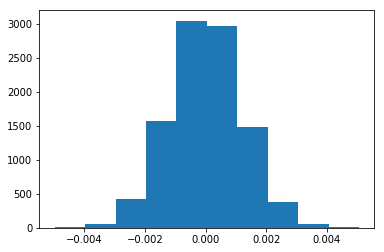

In [229]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

Observed difference : -0.0015782389853555567
P Value : 0.9054


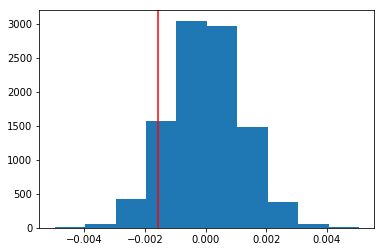

In [230]:
obs_diff = prp_treat_convert - prp_cntrl_convert
print("Observed difference : {}".format(obs_diff))
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');
p_val = (p_diffs > obs_diff).mean()

print("P Value : {}".format(p_val))

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We just calulated the P value.
    The P value is the probability to observe our statistic, if the null hypothesis is true.
    Given this number we proceed like this : "small P value then choose H1" , "large P value then choose H0".
    In regards with "how small" or "how large" p value, we consult our Alpha, in this case 0.05 (our readiness to make Type 1 errors) and we follow this:
    
    P value <= Alpha - > Reject H0
    P value > Alpha - > Fail to reject H0 (Stay with the H0, accept it).
    
Given the fact that during the test our P value > Alpha then :
We fail to reject the H0.

$H_{0}$ was **$p_{new}$** - **$p_{old}$** <= 0 and
$H_{1}$ was **$p_{new}$** - **$p_{old}$** > 0



So by accepting the Ho, we prove again (this time with Hypothesis testing) that the OLD page converstion rate is bigger than the NEW page converstion rate.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [231]:
import statsmodels.api as sm

#Earlier in the project we made the necessary calculations, 
#We will use the results from the previous calculculations
convert_old = cntrl_group_conv
convert_new = treat_group_conv

#we make the necessary counts and save to the proposed variables
n_old = cntrl_group.user_id.count()
n_new = treat_group.user_id.count()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [232]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest


z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='larger')

In [233]:
z_score, p_value


(1.3109241984234394, 0.094941687240975514)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

We calculated "The test statistic" (z-score or simply z) defined by the following equation.

z = (x - M ) / [ σ /sqrt(n) ]
where x is the observed sample mean, M is the hypothesized population mean (from the null hypothesis), and σ is the standard deviation of the population.


The P-value is the probability of observing a sample statistic as extreme as the test statistic. Since the test statistic is a z-score, use the Normal Distribution Calculator to assess the probability associated with the z-score.

Evaluating of the null hypothesis. 
The evaluation involves comparing the P-value to the significance level, and rejecting the null hypothesis when the P-value is less than the significance level. 

Conclusion - since the P-value > significance level (Alpha = 0.05), we again fail to reject the null hypothesis.

$H_{0}$ was **$p_{new}$** - **$p_{old}$** <= 0 and
$H_{1}$ was **$p_{new}$** - **$p_{old}$** > 0


So we again conclude that the converstion rate of the OLD page is bigger than the conversion rate of the new page.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regresion will be the best fit due to the fact that we want to analyze based on a categorical data (Converted / Not Converted).


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [234]:
#Creating the intercept and the necessary dummy variables
df2['intercept']=1
df2[['ab_page', 'treatment']] = pd.get_dummies(df2['group'])

#Preview
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [235]:
#We creat the model, we predict converted, by using the intercept and the page
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [236]:
#Visualize
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:58:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [237]:
#Calculating from the coeficient, so that we got "times" number

np.exp(0.0150)

1.0151130646157189

Having all other variables as constant, there are 1.015 times more users converted than those that are not converted.
We conclude that the new page is not necessay better than the old page, because the difference of 0.015 is not a significat one in reality.


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value of the logistic regression is different than what we found in the null and alternative hypthesis model, because during it we assume that there is an equal probability of the old and new page converting users and prove or rejects this.

This is not the case for the logistic regresion. Here we showed the difference in converting users, while holding all other variables constant.

However our final value (difference of arround 1%) showed the conversion rate difference is not significant.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

By adding more factors to our tests we can make it statistically significant.
If we find a factor that makes such difference.

For example, factors like - "the age of the user" or "on which day of the week the user saw the page"  might improve our results.
The country of the user is another factor that is worth checking and we do so in the next sections.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [238]:
#reading and joining databases
countries_df = pd.read_csv('./countries.csv')
df_country = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [186]:
#preview
df_country.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,treatment,CA,UK,US,US_ab_page,UK_ab_page,CA_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0,0


In [189]:
#How many unique countries we have in the resulting dataframe
df_country['country'].nunique()

3

In [191]:
#Countries names grouped
df_country.groupby(['country']).count()

,timestamp,group,landing_page,converted,intercept,ab_page,treatment,CA,UK,US,US_ab_page,UK_ab_page,CA_ab_page
country,,,,,,,,,,,,,
CA,14499,14499,14499,14499,14499,14499,14499,14499,14499,14499,14499,14499,14499
UK,72466,72466,72466,72466,72466,72466,72466,72466,72466,72466,72466,72466,72466
US,203619,203619,203619,203619,203619,203619,203619,203619,203619,203619,203619,203619,203619


In [192]:
#Creating the necessary dummy variables
df_country[['CA', 'UK', 'US']] = pd.get_dummies(df_country['country'])
df_country.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,treatment,CA,UK,US,US_ab_page,UK_ab_page,CA_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0,0


In [193]:
#Modeling, we drop one country, so that we have full rank matrices during the test
log_model = sm.Logit(df_country['converted'], df_country[['intercept', 'ab_page', 'CA', 'UK']])
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [194]:
#result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        21:50:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [195]:
#Printing the information for the conversion rates

print("US converstion rate: ")
print(df_country[df_country['US'] == 1].converted.mean())

print("\n UK converstion rate: ")
print(df_country[df_country['UK'] == 1].converted.mean())

print("\n CA converstion rate: ")
print(df_country[df_country['CA'] == 1].converted.mean())



US converstion rate: 
0.119546800642

 UK converstion rate: 
0.12059448569

 CA converstion rate: 
0.115318297814


At the end of this test, we see that the country do not affect the converstion rate, due to the fact that three values are very close to each other.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [196]:
#Creating the additional columns for interaction
#We multiply the country and the page columns

df_country['US_ab_page'] = df_country['UK'] * df_country['ab_page']
df_country['UK_ab_page'] = df_country['CA'] * df_country['ab_page']
df_country['CA_ab_page'] = df_country['US'] * df_country['ab_page']



In [197]:
#Modeling, again droping one of the dummy variables so that we have full rank matrices
log_mod = sm.Logit(df_country['converted'], df_country[['intercept', 'US_ab_page', 'UK_ab_page', 'CA_ab_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:               9.383e-06
Time:                        21:53:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.5731
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
US_ab_page     0.0115      0.018      0.639      0.523      -0.024       0.047
UK_ab_page    -0.0002      0.037     -0.006      0.995      -0.073       0.073
CA_ab_page     0.0173      0.013      1.374      0.170      -0.007       0.042
==============================================================================
"""

In [198]:
#calculating the "times" from the result coeficients
np.exp(result.params)

intercept     0.134827
US_ab_page    1.011611
UK_ab_page    0.999761
CA_ab_page    1.017439
dtype: float64

To finalize this part, we see that even when taking into consideration the interaction between the country and the page, again we see no difference in the conversion rate.


<a id='conclude'></a>
## Conclusion


Based on all statistical tests above (actual differences observed, hypothesis testing, z-test, logistic regression model) we recomend to the company to keep the old page.

The investment into the new one will not be justified.

<a id='references'></a>
## References and additional Materials used


https://stattrek.com/statistics/dictionary.aspx?definition=one-sample%20z-test

Additinal link for z-test, from Lesson 12 Hypothesis Testing

https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest

Additonal link for z-test, from the Project references

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

Additional article for better understanding of the z-test and hypothesis testing in general


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [251]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0